In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,auc,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import scipy.stats as sp
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [3]:
from sklearn.model_selection import train_test_split


In [379]:
data = pd.read_csv('bank-additional-full.csv',sep=';')
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [381]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [362]:
data.shape

(41188, 21)

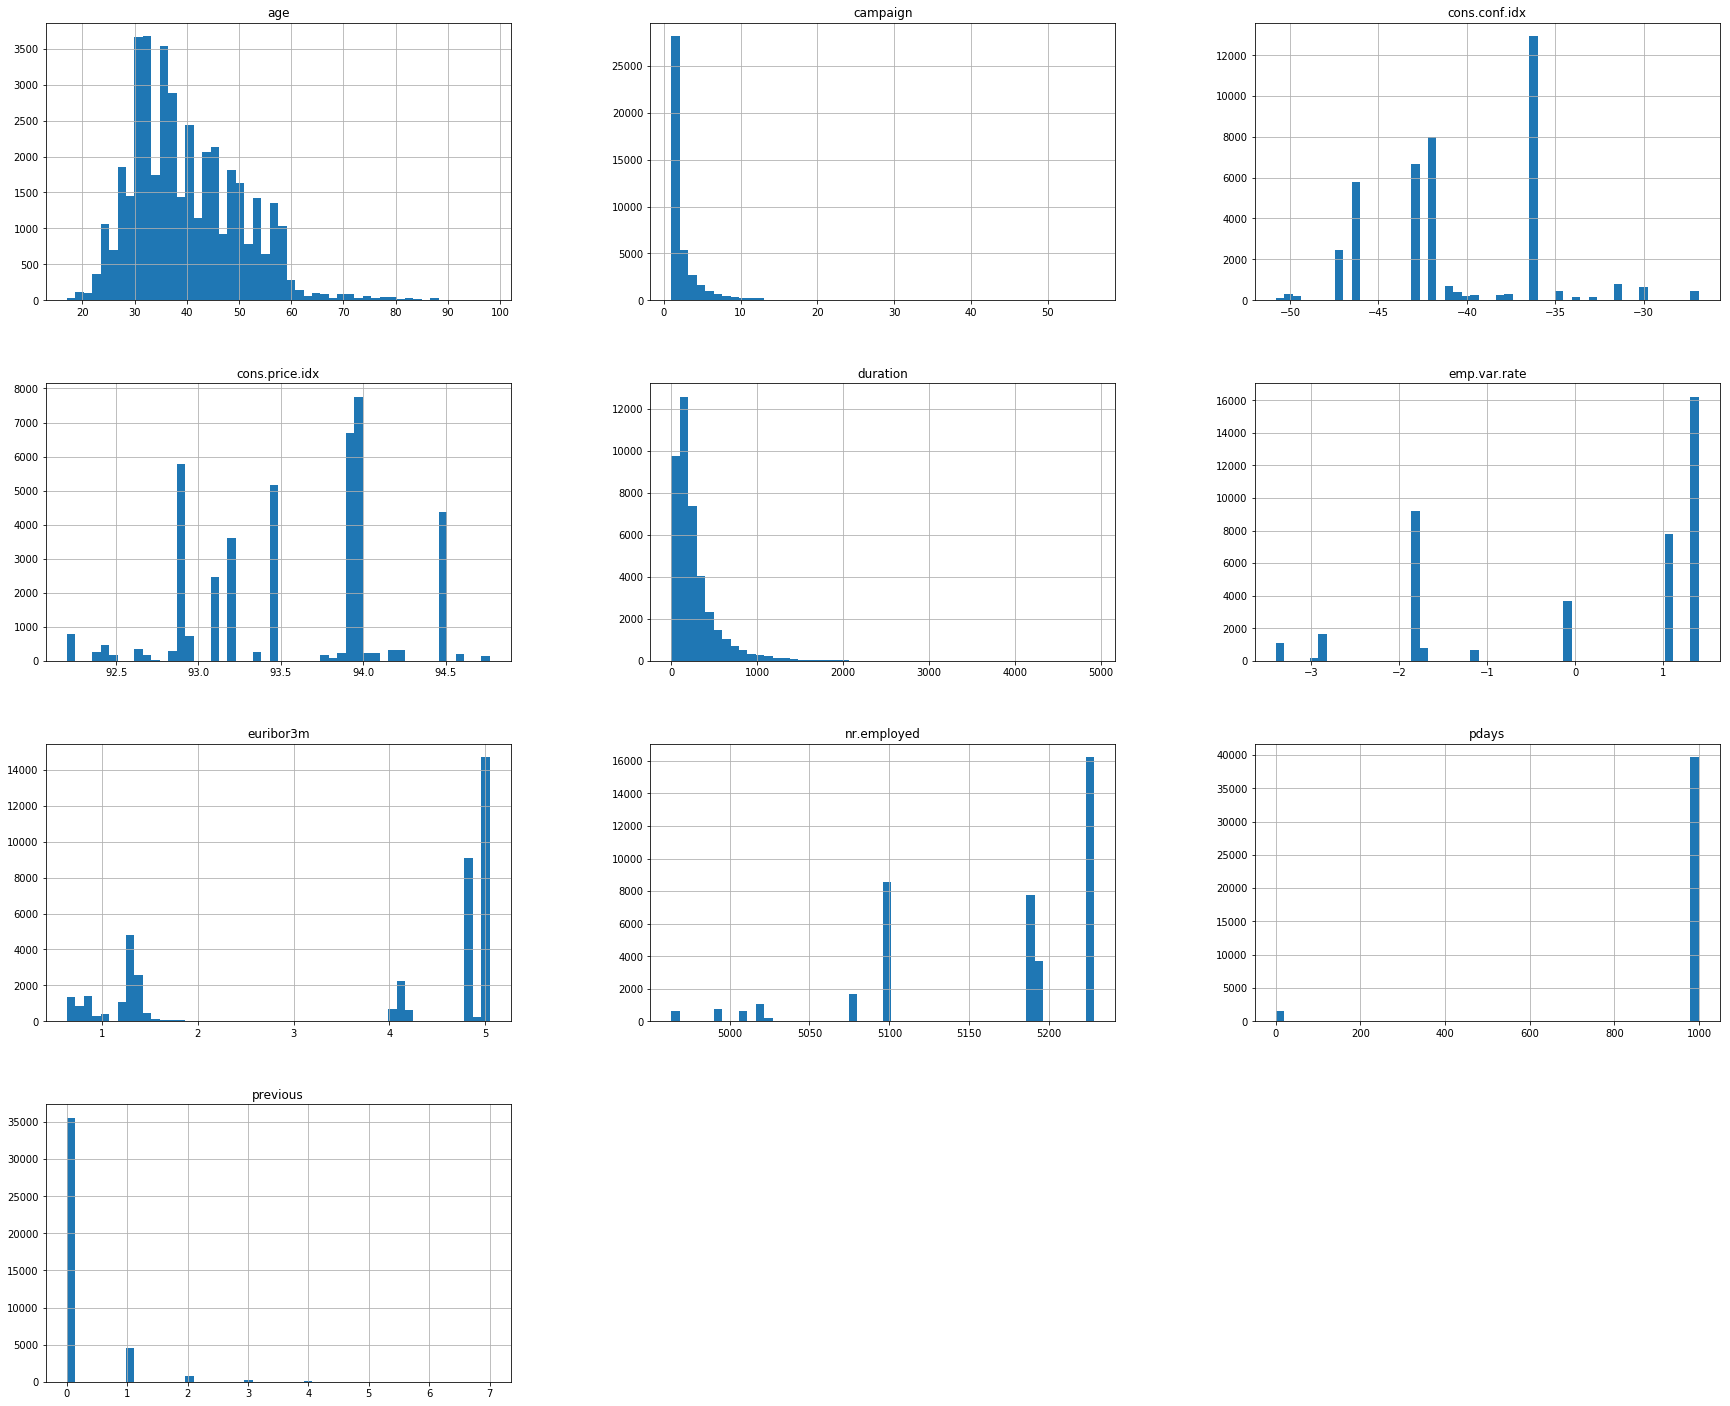

In [56]:
data.hist(bins=50, figsize=(30,25))
plt.show()

In [114]:
# remove outlier values well above normal range (only one sided outliers appear)

data=data[data.age<data.age.quantile(.98)]
data=data[data.campaign<data.campaign.quantile(.98)]
data=data[data.duration<data.duration.quantile(.98)]

In [115]:
data=data.drop(['duration'],axis=1)
data=data.drop(['contact'],axis=1)
data=data.drop(['day_of_week'],axis=1)
# data=data.drop(['contact'],axis=1)

In [37]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

y[y == 'no']=0
y[y=='yes']=1
y=y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=14)

In [23]:
X_train.shape,X_val.shape,X_test.shape

((27958, 17), (4934, 17), (5805, 17))

# Dealing with Missing values and Feature Engineering

In [ ]:
#We calculate P values to know feature importances

In [13]:
def p_val(column):
    column=column.copy()
    column[column!="unknown"]='known'
    freqtab = pd.crosstab(column,y_train)
    print freqtab
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)

In [27]:
p_val(X_train['education'])

y              0     1
education             
known      24250  2592
unknown      987   129
('ChiSquare test statistic: ', 4.20105911870011)
('p-value: ', 0.0403987405031329)


In [14]:
X_train['education'].value_counts() 

university.degree      8335
high.school            6514
basic.9y               4198
professional.course    3545
basic.4y               2660
basic.6y               1584
unknown                1116
illiterate                6
Name: education, dtype: int64

In [16]:
p_val(X_train['default'])

y            0     1
default             
known    19533  2502
unknown   5704   219
('ChiSquare test statistic: ', 310.6849313855113)
('p-value: ', 1.5488791124616083e-69)


In [26]:
X_train['default'].value_counts()

no         22032
unknown     5923
yes            3
Name: default, dtype: int64

In [50]:
p_val(X_train['loan'])

y          0     1
loan              
known  25237  2721
('ChiSquare test statistic: ', 0.0)
('p-value: ', 1.0)


In [51]:
X_train['loan'].value_counts()

no     23719
yes     4239
Name: loan, dtype: int64

In [31]:

p_val(X_train['housing'])

y            0     1
housing             
known    24630  2659
unknown    607    62
('ChiSquare test statistic: ', 0.11875786918066956)
('p-value: ', 0.7303856046178857)


In [32]:
X_train['housing'].value_counts()

yes        14714
no         12575
unknown      669
Name: housing, dtype: int64

In [34]:
p_val(X_train['marital'])

y            0     1
marital             
known    25189  2713
unknown     48     8
('ChiSquare test statistic: ', 0.8557799958324166)
('p-value: ', 0.3549223306549103)


In [35]:
X_train['marital'].value_counts()

married     16837
single       7994
divorced     3071
unknown        56
Name: marital, dtype: int64

In [38]:
X_train_copy=X_train.copy()

In [39]:
def imputer_my(df,cols):
    for e in cols:
        df[e][df[e]=='unknown']=X_train_copy[e].mode()[0]
    return(df)

In [40]:
X_train=imputer_my(X_train,['housing','loan','marital','job','education'])
X_val=imputer_my(X_val,['housing','loan','marital','job','education'])
X_test=imputer_my(X_test,['housing','loan','marital','job','education'])

In [41]:
X_train = X_train.replace({"education" : {"illiterate" : 1, "basic.4y" : 2,"basic.6y" : 3, "basic.9y" : 4, "high.school" : 5, "university.degree" : 6, "professional.course" : 7},
                       "default" : {"unknown" : 2, "yes" : 3, "no" : 1},
                       "poutcome" : {"failure" : 0, "nonexistent" : 1, "success": 2}})

X_val = X_val.replace({"education" : {"illiterate" : 1, "basic.4y" : 2,"basic.6y" : 3, "basic.9y" : 4, "high.school" : 5, "university.degree" : 6, "professional.course" : 7},
                       "default" : {"unknown" : 2, "yes" : 3, "no" : 1},
                       "poutcome" : {"failure" : 0, "nonexistent" : 1, "success": 2}})

X_test = X_test.replace({"education" : {"illiterate" : 1, "basic.4y" : 2,"basic.6y" : 3, "basic.9y" : 4, "high.school" : 5, "university.degree" : 6, "professional.course" : 7},
                       "default" : {"unknown" : 2, "yes" : 3, "no" : 1},
                       "poutcome" : {"failure" : 0, "nonexistent" : 1, "success": 2}})

In [42]:
X_train.head()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29604,32,technician,single,7,1,no,no,apr,1,999,1,0,-1.8,93.075,-47.1,1.405,5099.1
36945,61,admin.,married,6,1,yes,yes,jul,4,999,0,1,-2.9,92.469,-33.6,1.085,5076.2
23621,41,technician,divorced,7,1,yes,no,aug,4,999,0,1,1.4,93.444,-36.1,4.962,5228.1
28440,33,services,married,5,1,yes,no,apr,1,999,1,0,-1.8,93.075,-47.1,1.435,5099.1
29441,32,management,single,6,1,yes,no,apr,3,999,0,1,-1.8,93.075,-47.1,1.405,5099.1


In [43]:
X_train.shape

(27958, 17)

In [44]:
num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
print(num_cols)

means=X_train[num_cols].mean()
stds=X_train[num_cols].std()
X_train[num_cols] = (X_train[num_cols]-means)/stds
X_test[num_cols] = (X_test[num_cols]-means)/stds
X_val[num_cols] = (X_val[num_cols]-means)/stds

Index([u'age', u'education', u'default', u'campaign', u'pdays', u'previous',
       u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx',
       u'euribor3m', u'nr.employed'],
      dtype='object')


In [47]:
X_train.head(),X_train.shape

(            age         job   marital  education  default housing loan month  \
 29604 -0.782089  technician    single   1.357693 -0.51845      no   no   apr   
 36945  2.305180      admin.   married   0.664326 -0.51845     yes  yes   jul   
 23621  0.176029  technician  divorced   1.357693 -0.51845     yes   no   aug   
 28440 -0.675631    services   married  -0.029041 -0.51845     yes   no   apr   
 29441 -0.782089  management    single   0.664326 -0.51845     yes   no   apr   
 
        campaign     pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
 29604 -0.737462  0.184561  1.728238 -2.593275     -1.229908       -0.877063   
 36945  0.992039  0.184561 -0.345143  0.206168     -1.939982       -1.938282   
 23621  0.992039  0.184561 -0.345143  0.206168      0.835764       -0.230875   
 28440 -0.737462  0.184561  1.728238 -2.593275     -1.229908       -0.877063   
 29441  0.415539  0.184561 -0.345143  0.206168     -1.229908       -0.877063   
 
        cons.conf.idx  euribor

In [48]:
def one_hotter(df,cols):
    for e in cols:
        dummies=pd.get_dummies(df[e])
        df=df.drop([e],axis=1)
        
        df=pd.concat((df,dummies),axis=1)
    return(df)

In [49]:
objcol = X_train.select_dtypes(include='object')
objcol=objcol.columns
objcol

Index([u'job', u'marital', u'housing', u'loan', u'month'], dtype='object')

In [50]:
Xtr=one_hotter(X_train,objcol)
Xte=one_hotter(X_test,objcol)
Xval=one_hotter(X_val,objcol)
Xval.shape,X_val.shape

((4934, 40), (4934, 17))

In [51]:
Xval.head()

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
16543,1.772893,1.357693,-0.51845,-0.737462,0.184561,-0.345143,0.206168,0.835764,0.599187,-0.463726,...,0,0,0,1,0,0,0,0,0,0
35196,1.347062,0.664326,-0.51845,-0.737462,0.184561,-0.345143,0.206168,-1.229908,-1.195779,-1.233865,...,0,0,0,0,0,0,1,0,0,0
5311,-0.888546,1.357693,-0.51845,-0.737462,0.184561,-0.345143,0.206168,0.642108,0.732277,0.922524,...,0,0,0,0,0,0,1,0,0,0
40687,-0.143343,-0.029041,-0.51845,-0.737462,-5.401534,5.875000,3.005612,-0.778042,1.091270,0.680481,...,0,0,0,0,0,0,0,0,0,1
28085,1.559978,0.664326,-0.51845,-0.737462,0.184561,-0.345143,0.206168,-1.229908,-0.877063,-1.431901,...,1,0,0,0,0,0,0,0,0,0


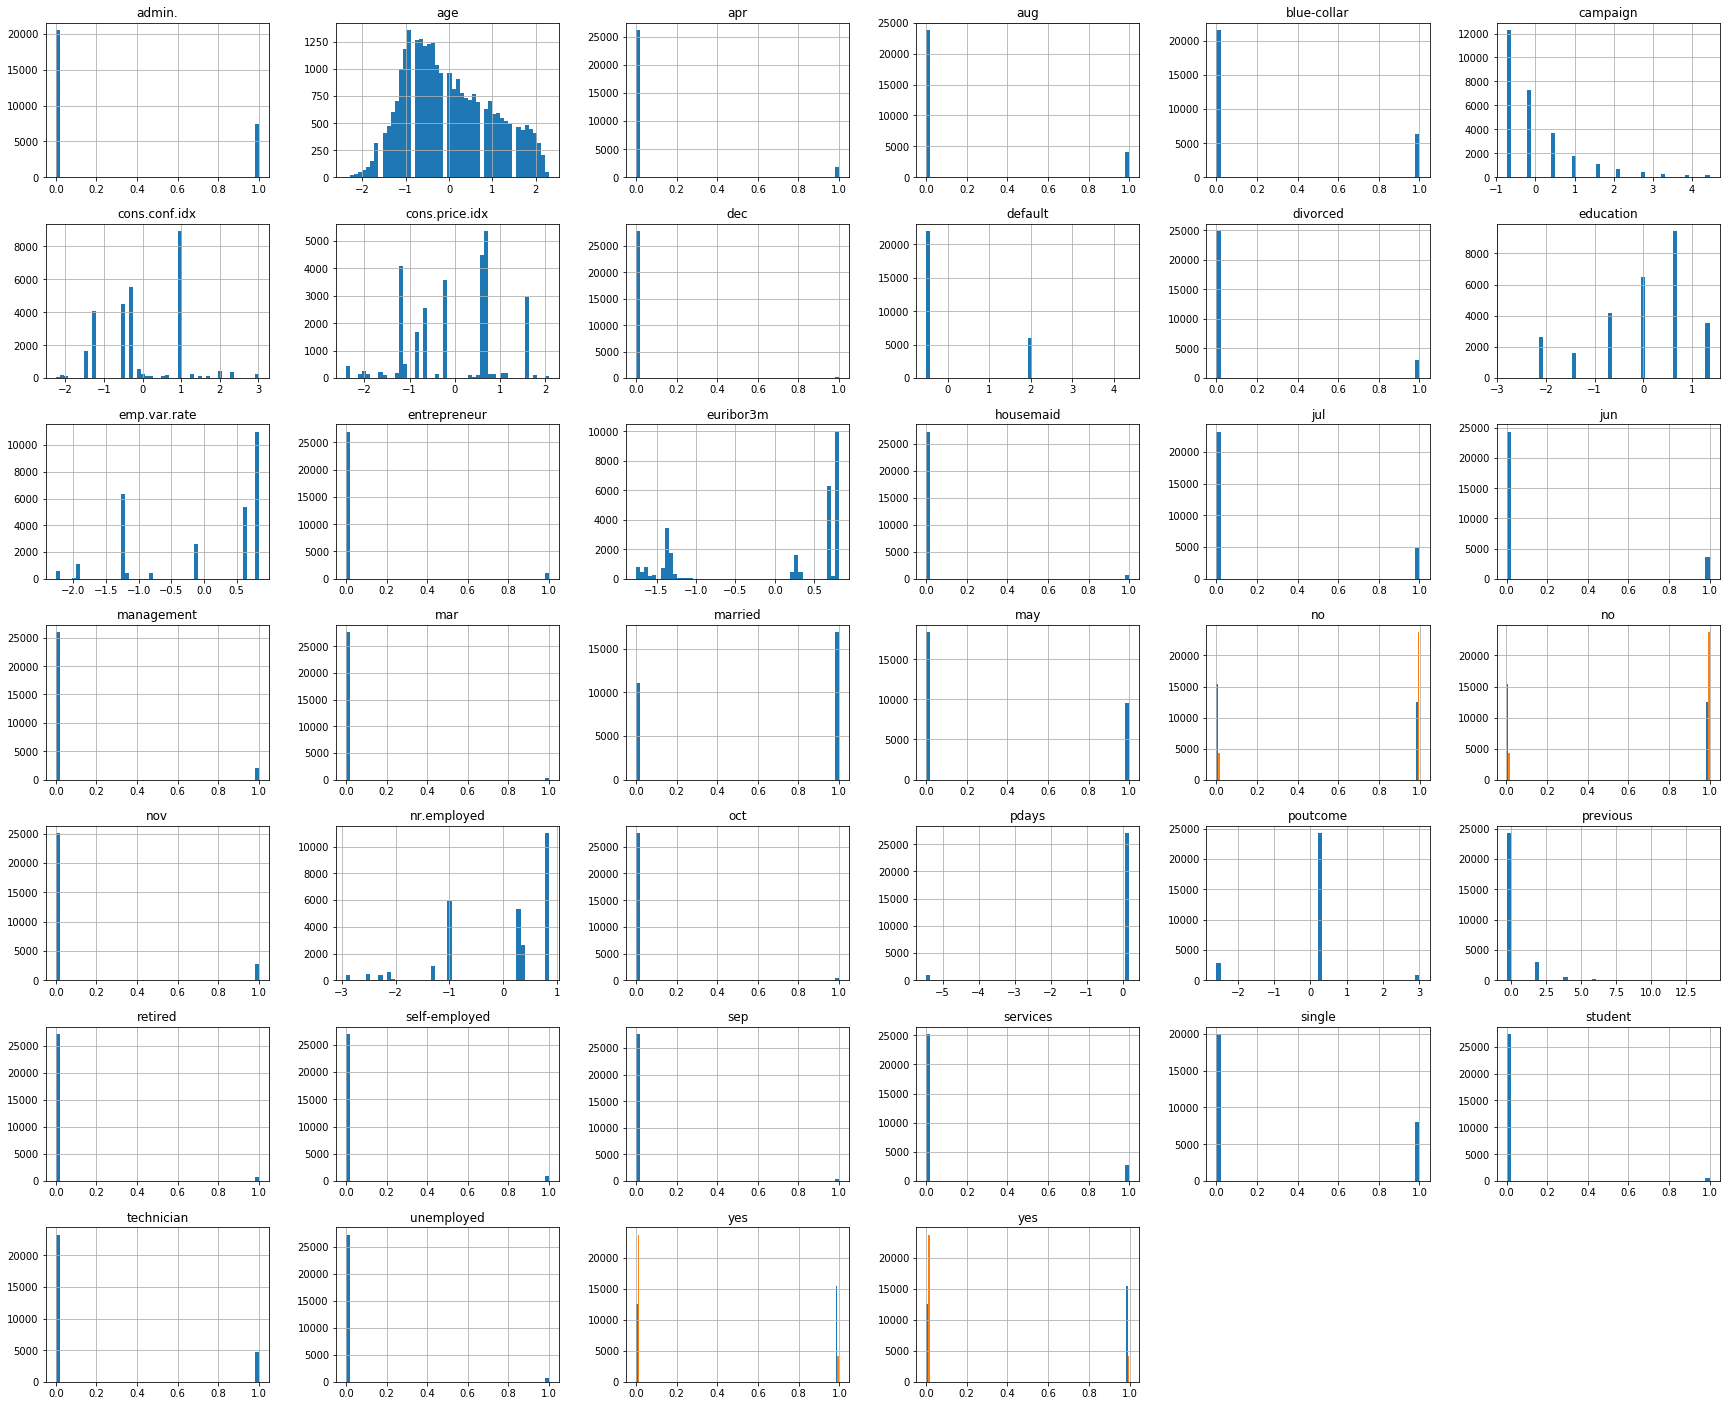

In [53]:
Xtr.hist(bins=50, figsize=(30,25))
plt.show()

In [54]:
# X_train.corr()
Xtr.describe()

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
count,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,2.795800e+04,...,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000,27958.000000
mean,2.258489e-16,-6.679287e-16,9.910442e-16,-1.034180e-15,7.632178e-16,-1.199254e-18,6.049957e-16,-2.847004e-15,4.976040e-12,-6.937518e-13,...,0.063309,0.148866,0.003505,0.171114,0.129051,0.011696,0.343086,0.102189,0.014951,0.012233
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.243523,0.355963,0.059102,0.376615,0.335262,0.107516,0.474748,0.302902,0.121359,0.109925
min,-2.378952e+00,-2.802509e+00,-5.184500e-01,-7.374616e-01,-5.452317e+00,-3.451433e-01,-2.593275e+00,-2.262744e+00,-2.407600e+00,-2.246048e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.820887e-01,-7.224081e-01,-5.184500e-01,-7.374616e-01,1.845607e-01,-3.451433e-01,2.061683e-01,-1.229908e+00,-8.770631e-01,-4.637260e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.433434e-01,-2.904116e-02,-5.184500e-01,-1.609615e-01,1.845607e-01,-3.451433e-01,2.061683e-01,6.421076e-01,-2.308753e-01,-2.656902e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.083171e-01,6.643258e-01,-5.184500e-01,4.155387e-01,1.845607e-01,-3.451433e-01,2.061683e-01,8.357644e-01,7.322771e-01,9.225243e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.305180e+00,1.357693e+00,4.371017e+00,4.451040e+00,1.845607e-01,1.416853e+01,3.005612e+00,8.357644e-01,2.085944e+00,3.012902e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
from scipy.stats import skew

intcol = X_train.select_dtypes(include='int64')
intcol=intcol.columns

floatcol=X_train.select_dtypes(include='float64')
floatcol=floatcol.columns

numcol=intcol.append(floatcol)
dfdrops2num=X_train[numcol]

skewness = dfdrops2num.apply(lambda x: skew(x)) #Log transform all skewed varibakes
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
dfdrops2num[skewed_features] = np.log1p(dfdrops2num[skewed_features])
print(dfdrops2num.shape)

9 skewed numerical features to log transform
(27958, 12)


In [122]:
num_cols = Xtr.columns[Xtr.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [57]:
Xtr.head()

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
29604,-0.782089,1.357693,-0.51845,-0.737462,0.184561,1.728238,-2.593275,-1.229908,-0.877063,-1.431901,...,1,0,0,0,0,0,0,0,0,0
36945,2.305180,0.664326,-0.51845,0.992039,0.184561,-0.345143,0.206168,-1.939982,-1.938282,1.538636,...,0,0,0,1,0,0,0,0,0,0
23621,0.176029,1.357693,-0.51845,0.992039,0.184561,-0.345143,0.206168,0.835764,-0.230875,0.988536,...,0,1,0,0,0,0,0,0,0,0
28440,-0.675631,-0.029041,-0.51845,-0.737462,0.184561,1.728238,-2.593275,-1.229908,-0.877063,-1.431901,...,1,0,0,0,0,0,0,0,0,0
29441,-0.782089,0.664326,-0.51845,0.415539,0.184561,-0.345143,0.206168,-1.229908,-0.877063,-1.431901,...,1,0,0,0,0,0,0,0,0,0


# Model

In [60]:
Xtr = Xtr.apply(pd.to_numeric)
Xte = Xte.apply(pd.to_numeric)
Xval = Xval.apply(pd.to_numeric)

In [79]:
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(random_state=9,criterion='entropy',max_features=15)
model1 = DecisionTreeClassifier(max_depth=10)
selector = RFE(estimator=model1, n_features_to_select=10)
selector = selector.fit(Xtr, y_train)
model.fit(Xtr, y_train)

print("Feature importances = {}".format(Xval.columns.values[selector.support_]))
y_pred = model.predict(Xval)
score = accuracy_score(y_val,y_pred)
score

Feature importances = ['age' 'education' 'campaign' 'pdays' 'previous' 'cons.conf.idx'
 'euribor3m' 'nr.employed' 'admin.' 'oct']


0.905958654235914

In [70]:
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier(max_depth=10)
selector = RFE(estimator=model1, n_features_to_select=15)
selector = selector.fit(Xtr, y_train)
model.fit(Xtr, y_train)

print("Feature importances for decision tree classifier = {}".format(Xval.columns.values[selector.support_]))
y_pred = model.predict(Xval)
score = accuracy_score(y_val,y_pred)
score

Feature importances for decision tree classifier = ['age' 'education' 'campaign' 'pdays' 'previous' 'poutcome'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed' 'admin.'
 'technician' 'married' 'no' 'oct']


0.9081880826915282

In [85]:
from sklearn.metrics import accuracy_score


model = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
selector = RFE(estimator=model1, n_features_to_select=15)
selector = selector.fit(Xtr, y_train)
model.fit(Xtr, y_train)

print("Feature importances for decision tree classifier = {}".format(Xval.columns.values[selector.support_]))
y_pred = model.predict(Xval)
score = accuracy_score(y_val,y_pred)
score

Feature importances for decision tree classifier = ['age' 'education' 'campaign' 'pdays' 'previous' 'poutcome'
 'cons.conf.idx' 'euribor3m' 'nr.employed' 'admin.' 'technician' 'married'
 'yes' 'no' 'oct']


0.9094041345764086

In [ ]:
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12,12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(Xtr.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [100]:
for e,k in zip(Xtr.columns,model.coef_[0]):
    print(e,k)

('age', -0.022430698695020266)
('education', 0.05866481398911456)
('default', -0.13409238040799867)
('campaign', -0.11499528769255886)
('pdays', -0.2047612113730122)
('previous', -0.02157380367800865)
('poutcome', 0.15302916044373338)
('emp.var.rate', -1.7675608898223585)
('cons.price.idx', 0.7539211051854177)
('cons.conf.idx', 0.013806685173232216)
('euribor3m', 0.2218409241371124)
('nr.employed', 0.13636144556430604)
('admin.', -0.04890152906892519)
('blue-collar', -0.26229402827413956)
('entrepreneur', -0.1606909820023249)
('housemaid', -0.09159970665481616)
('management', 0.0031543303118575436)
('retired', 0.1321135264836991)
('self-employed', -0.30048979912388823)
('services', -0.2266092388432236)
('student', 0.15520160996683777)
('technician', -0.06977093743884691)
('unemployed', -0.06868130746378905)
('divorced', -0.31622403418855416)
('married', -0.31634297503771186)
('single', -0.3060010528786746)
('no', -0.4570777308119437)
('yes', -0.4814903312919847)
('no', -0.4645579688785

Feature ranking:
1. feature age (0.192690)
2. feature euribor3m (0.182593)
3. feature campaign (0.083055)
4. feature education (0.070711)
5. feature nr.employed (0.053832)
6. feature pdays (0.043460)
7. feature poutcome (0.034172)
8. feature cons.conf.idx (0.026517)
9. feature emp.var.rate (0.022950)
10. feature cons.price.idx (0.020811)
11. feature previous (0.019583)
12. feature no (0.019351)
13. feature yes (0.019269)
14. feature admin. (0.018095)
15. feature married (0.015688)
16. feature technician (0.014957)
17. feature single (0.014749)
18. feature default (0.013975)
19. feature yes (0.012728)
20. feature no (0.012524)
21. feature blue-collar (0.011845)
22. feature management (0.010229)
23. feature divorced (0.009615)
24. feature services (0.009490)
25. feature oct (0.007208)
26. feature self-employed (0.006712)
27. feature student (0.006407)
28. feature entrepreneur (0.005821)
29. feature unemployed (0.005649)
30. feature mar (0.005166)
31. feature retired (0.004953)
32. featur

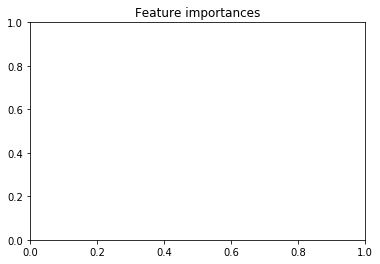

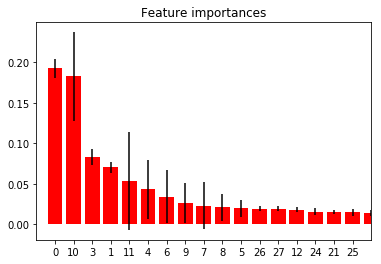

In [110]:
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(Xtr, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(Xtr.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, Xtr.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtr.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
The three major changes that can be made are:
    Target people with higher age
    Target when euribor3m is low
    Target people of higher education
    Target those who have been contacted before(poutcome)


In [390]:
# Testing this on validation data
a=0.1; b=0.7;c=0.4;f=0.2
data = Xval
target=y_val

y=y_test[y_test==1].shape
print(y[0],'out of',s[0],'sucessful')
print('Current Sucess rate: ',str(round((y[0]+0.1)/s[0] * 100,3))+'%')

data=pd.concat((data,target),axis=1)


data=data[data.age>data.age.quantile(a)]
data=data[data.education>data.education.quantile(b)]
data=data[data.euribor3m<data.euribor3m.quantile(c)]
data=data[data.poutcome>data.poutcome.quantile(f)]



d=data.shape

k=data[data.y==1].shape
data[data.y==1].shape
print(k[0],'out of',d[0],'sucessful')


print('Sucess rate after changes: ',str(round((k[0]+0.1)/d[0]* 100,3))+'%')


(546, 'out of', 5805, 'sucessful')
('Current Sucess rate: ', '9.407%')
(47, 'out of', 175, 'sucessful')
('Sucess rate after changes: ', '26.914%')


# Effects of targetting on final test data

In [403]:
# Testing this on test data
data = Xte
target=y_test


y=y_test[y_test==1].shape
print(y[0],'out of',s[0],'sucessful')
print('Current Sucess rate: ',str(round((y[0]+0.1)/s[0] * 100,3))+'%')

data=pd.concat((data,target),axis=1)


data=data[data.age>data.age.quantile(a)]
data=data[data.education>data.education.quantile(b)]
data=data[data.euribor3m<data.euribor3m.quantile(c)]
data=data[data.poutcome>data.poutcome.quantile(f)]



d=data.shape

k=data[data.y==1].shape
data[data.y==1].shape
print(k[0],'out of',d[0],'sucessful')


print('Sucess rate after changes: ',str(round((k[0]+0.1)/d[0]* 100,3))+'%')



(546, 'out of', 5805, 'sucessful')
('Current Sucess rate: ', '9.407%')
(27, 'out of', 125, 'sucessful')
('Sucess rate after changes: ', '21.68%')


# Conclusion (See Repo Description)

In [ ]:
People with higher age should be targeted. This is probably due to the spending 
habits of younger people and the conservative habits of the older.
Target people when the euribor3m rate is low. This has shown to be strong indicator so the company should observe
this metric in the economy and plan its call when it reaches low levels.
People who were part of a previsous campign should be targed first as familiarity is a powerful persuasion tactic. 
However there are extremely few people as such. People with higher degrees in education are more likely to respond.
By doing these above we increase the effectivnes of calls from 9.407% to 20.909%, more than double the sucess rate. 
With these profiles now, the company can target the larger population having the same characteristic. If we assume a 
total cost of X Rs, then the company would have saved around 10% of that so this project is quite productive in 
saving costs to the company.